In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
# By Alexandra Lee
# (updated October 2018)
# 
# Main
#
# Dataset: Pseudomonas aeruginosa gene expression from compendium 
# referenced in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5069748/
# 
# Condition: expression of PA1673 gene
#
# Task: To predict the expression of other (non-PA1673) genes by:
#        1. Define offset vector = avg(expression of genes corresponding to high levels of PA1673) 
#           - avg(expression of genes corresponding to low levels of PA1673)
#        2. scale factor = how far along the gradient of low-high PA1673 expression
#        3. prediction = baseline expression + scale factor * offset vector 
#-------------------------------------------------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np

from functions import generate_input, vae, def_offset, interpolate, plot

randomState = 123
from numpy.random import seed
seed(randomState)

Using TensorFlow backend.


In [2]:
# Name of analysis
analysis_name = 'PA1673_gradient_test'

# Create list of base directories
base_dirs = [os.path.join(os.path.dirname(os.getcwd()), 'data'),
             os.path.join(os.path.dirname(os.getcwd()), 'encoded'),
             os.path.join(os.path.dirname(os.getcwd()), 'models'),
             os.path.join(os.path.dirname(os.getcwd()), 'output'),
             os.path.join(os.path.dirname(os.getcwd()), 'stats'),
             os.path.join(os.path.dirname(os.getcwd()), 'viz')    
]

# Check if directory exist otherwise create
for each_dir in base_dirs:
    analysis_dir = os.path.join(each_dir, analysis_name)
    if os.path.exists(analysis_dir):
        print('directory already exists: {}'.format(analysis_dir))
    else:
        os.mkdir(analysis_dir)
        print('creating new directory: {}'.format(analysis_dir))

directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/data/PA1673_gradient_test
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/encoded/PA1673_gradient_test
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/models/PA1673_gradient_test
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/output/PA1673_gradient_test
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/stats/PA1673_gradient_test
directory already exists: /home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/viz/PA1673_gradient_test


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/vae.py:259: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  vae.compile(optimizer=adam, loss=None, loss_weights=[beta])


Train on 1072 samples, validate on 119 samples
Epoch 1/200
1072/1072 [==============================] - 1s 1ms/step - loss: 3755.4063 - val_loss: 3626.1111
Epoch 2/200
1072/1072 [==============================] - 1s 855us/step - loss: 3590.7111 - val_loss: 3595.5127
Epoch 3/200
1072/1072 [==============================] - 1s 836us/step - loss: 3525.7637 - val_loss: 3616.1362
Epoch 4/200
1072/1072 [==============================] - 1s 837us/step - loss: 3498.3181 - val_loss: 3639.6006
Epoch 5/200
1072/1072 [==============================] - 1s 847us/step - loss: 3486.8382 - val_loss: 3590.9883
Epoch 6/200
1072/1072 [==============================] - 1s 828us/step - loss: 3476.3841 - val_loss: 3565.4029
Epoch 7/200
1072/1072 [==============================] - 1s 956us/step - loss: 3470.9305 - val_loss: 3535.8960
Epoch 8/200
1072/1072 [==============================] - 1s 829us/step - loss: 3468.5891 - val_loss: 3506.7823
Epoch 9/200
1072/1072 [==============================] - 1s 833us/s

Epoch 74/200
1072/1072 [==============================] - 1s 942us/step - loss: 3382.6542 - val_loss: 3402.8215
Epoch 75/200
1072/1072 [==============================] - 1s 831us/step - loss: 3384.4238 - val_loss: 3407.7270
Epoch 76/200
1072/1072 [==============================] - 1s 804us/step - loss: 3381.9606 - val_loss: 3401.2578
Epoch 77/200
1072/1072 [==============================] - 1s 795us/step - loss: 3381.2134 - val_loss: 3404.5175
Epoch 78/200
1072/1072 [==============================] - 1s 793us/step - loss: 3381.9351 - val_loss: 3401.4558
Epoch 79/200
1072/1072 [==============================] - 1s 807us/step - loss: 3381.6267 - val_loss: 3400.0814
Epoch 80/200
1072/1072 [==============================] - 1s 793us/step - loss: 3381.1797 - val_loss: 3397.2899
Epoch 81/200
1072/1072 [==============================] - 1s 797us/step - loss: 3378.8547 - val_loss: 3396.8396
Epoch 82/200
1072/1072 [==============================] - 1s 782us/step - loss: 3379.4999 - val_loss: 33

1072/1072 [==============================] - 1s 784us/step - loss: 3354.7546 - val_loss: 3378.2789
Epoch 147/200
1072/1072 [==============================] - 1s 791us/step - loss: 3355.0741 - val_loss: 3379.2193
Epoch 148/200
1072/1072 [==============================] - 1s 806us/step - loss: 3353.2771 - val_loss: 3377.5331
Epoch 149/200
1072/1072 [==============================] - 1s 794us/step - loss: 3353.5687 - val_loss: 3381.5664
Epoch 150/200
1072/1072 [==============================] - 1s 891us/step - loss: 3354.4635 - val_loss: 3378.3059
Epoch 151/200
1072/1072 [==============================] - 1s 813us/step - loss: 3354.0929 - val_loss: 3378.6409
Epoch 152/200
1072/1072 [==============================] - 1s 804us/step - loss: 3353.0237 - val_loss: 3376.0940
Epoch 153/200
1072/1072 [==============================] - 1s 851us/step - loss: 3353.1666 - val_loss: 3377.5581
Epoch 154/200
1072/1072 [==============================] - 1s 842us/step - loss: 3353.4580 - val_loss: 3377.87

/home/alexandra/anaconda3/envs/Pa/lib/python3.5/site-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Number of genes in low expression group is (60, 5548)
Number of gene in high expression group is (60, 5548)


/home/alexandra/Documents/Repos/Pseudomonas_latent_spaces/scripts/functions/plot.py:46: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  X_sorted = X.loc[sorted_id.index].dropna()


TypeError: set_label() takes 2 positional arguments but 3 were given

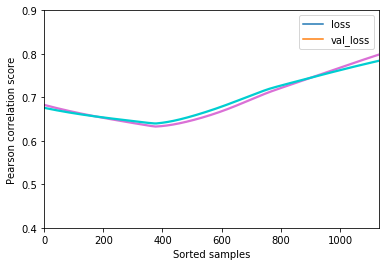

In [3]:
# Pre-process input
data_dir = os.path.join(base_dirs[0], analysis_name)
generate_input.generate_input_PA1673_gradient(data_dir)

# Run Tybalt
learning_rate = 0.001
batch_size = 100
epochs = 200
kappa = 0.01
intermediate_dim = 100
latent_dim = 10
epsilon_std = 1.0

base_dir = os.path.dirname(os.getcwd())
vae.tybalt_2layer_model(learning_rate, batch_size, epochs, kappa, intermediate_dim, latent_dim, epsilon_std, base_dir, analysis_name)


# Define offset vectors in gene space and latent space
data_dir = os.path.join(base_dirs[0], analysis_name)
target_gene = "PA1673"
percent_low = 5
percent_high = 95

def_offset.gene_space_offset(data_dir, target_gene, percent_low, percent_high)

model_dir = os.path.join(base_dirs[2], analysis_name)
encoded_dir = os.path.join(base_dirs[1], analysis_name)

def_offset.latent_space_offset(data_dir, model_dir, encoded_dir, target_gene, percent_low, percent_high)


# Predict gene expression using offset in gene space and latent space
out_dir = os.path.join(base_dirs[3], analysis_name)

interpolate.interpolate_in_gene_space(data_dir, target_gene, out_dir, percent_low, percent_high)
interpolate.interpolate_in_latent_space(data_dir, model_dir, encoded_dir, target_gene, out_dir, percent_low, percent_high)


# Plot prediction per sample along gradient of PA1673 expression
viz_dir = os.path.join(base_dirs[5], analysis_name)
plot.plot_corr_gradient(out_dir, viz_dir)